In [1]:
import traytable as tt
import matplotlib.pyplot as plt

Download this notebook and try it out yourself [here](https://github.com/dennisbrookner/traytable/blob/main/docs/examples/0_simple_example.ipynb)

## Making a screen
First, initialize the screen with `screen()`. This function requires that you specify

 * the parameter that varies by row 
 * the parameter that varies by column
 * the plate shape, in the form of a "max well", e.g. the well in the bottom right corner of the plate.
 
Note that `row` refers to the parameter encoded by the row name; this is the parameter that is the same within a row, rather than the parameter that varies across the row. Likewise for columns.

Finally, whatever additional named arguments you pass to `screen()` become "screen static" global parameters that apply to all wells in all trays in the screen. Perhaps you include the protein construct, a nickname for the screen, or the type of plate you're using.

In [2]:
myscreen = tt.screen(row = 'protein', col = 'PEG', maxwell = 'H6', 
                     construct = 'HEWL', buffer = 'imidazole 20mM')

Now let's make a tray. Like with `screen()`, `tray()` will parse any additional named arguments as "tray static" parameters that apply to all wells in the tray. A common example might be the date the tray was set, or a buffer or additive that is the same across the plate.

Most importantly, `tray()` accepts arguments `rows` and `cols` to specify the values of the parameters varying across the plate. These can be set in three ways:  

 * with a list of two numbers, e.g. `row = [4, 18]` which would evenly space values across the rows (with number of rows determined via the `maxwell` parameter for the screen  
   
 * with a list of numbers equal in length to the number of rows/columns, which get mapped to rows/columns explicitly  
   
 * with a single number, which will be used for all rows/columns  

In [3]:
tray1 = tt.tray(myscreen, date = '2021-01-01', pH = 5.8,
                rows = [4,18],
                cols = [20,25])

The `clonetray()` method clones a tray with useage `newtray = clonetray(screen, oldtray, **kwargs)` where you can override specific parameters of the tray being cloned. When trays are similar (or identical) this saves some typing.

In [5]:
tray2 = tt.clonetray(tray1, date = '2021-01-03',
                     rows = [4, 5, 6, 7, 8, 10, 12, 14])

In this case, using `clonetray()` instead of `tray()` saves you from having to re-specify the pH and the column values, which haven't changed from the previous tray.

## Logging hits!
Our two trays have some crystals! We can log wells with good (or bad!) crystals via the `well()` function. `well()` requires the tray, well, and a short string to describe crystal quality; any other named parameters (perhaps a more verbose description, or a number of crystals) are accepted and get their own column in the resulting dataframe. 

For all but the first call to `well()`, don't forget `old_df=df` to concatenate the new results with the old results.

In [7]:
df = tt.well(tray1, 'A6', 'good', quantity = 3)
df = tt.well(tray1, 'B6', 'good', quantity = 2, note = "chunkier than usual", old_df=df)
df = tt.well(tray1, 'C6', 'needles', old_df=df)

In [8]:
df

,protein,PEG,quality,construct,buffer,date,pH,tray,well,quantity,note
0,4.0,25.0,good,HEWL,imidazole 20mM,2021-01-01,5.8,tray1,A6,3.0,NaN
1,6.0,25.0,good,HEWL,imidazole 20mM,2021-01-01,5.8,tray1,B6,2.0,chunkier than usual
2,8.0,25.0,needles,HEWL,imidazole 20mM,2021-01-01,5.8,tray1,C6,NaN,NaN


The `well()` function uses the tray and well to look up all the data you've logged in your screens.

If you have many wells, all of the same quality, you can log them all at once:

In [9]:
df = tt.well(tray2, ['B3', 'C3', 'D3', 'E3'], 'needles', old_df=df)
df = tt.well(tray2, ['A5', 'A6', 'B5'], 'good', old_df=df, note='borderline')
df

,protein,PEG,quality,construct,buffer,date,pH,tray,well,quantity,note
0,4.0,25.0,good,HEWL,imidazole 20mM,2021-01-01,5.8,tray1,A6,3.0,NaN
1,6.0,25.0,good,HEWL,imidazole 20mM,2021-01-01,5.8,tray1,B6,2.0,chunkier than usual
2,8.0,25.0,needles,HEWL,imidazole 20mM,2021-01-01,5.8,tray1,C6,NaN,NaN
3,5,22.0,needles,HEWL,imidazole 20mM,2021-01-03,5.8,tray2,B3,NaN,NaN
4,6,22.0,needles,HEWL,imidazole 20mM,2021-01-03,5.8,tray2,C3,NaN,NaN
5,7,22.0,needles,HEWL,imidazole 20mM,2021-01-03,5.8,tray2,D3,NaN,NaN
6,8,22.0,needles,HEWL,imidazole 20mM,2021-01-03,5.8,tray2,E3,NaN,NaN
7,4,24.0,good,HEWL,imidazole 20mM,2021-01-03,5.8,tray2,A5,NaN,borderline
8,4,25.0,good,HEWL,imidazole 20mM,2021-01-03,5.8,tray2,A6,NaN,borderline
9,5,24.0,good,HEWL,imidazole 20mM,2021-01-03,5.8,tray2,B5,NaN,borderline


Finally, let's visualize which conditions are giving good crystals vs. needles.

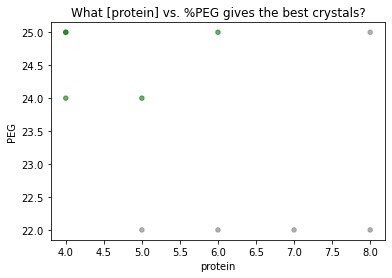

In [10]:
colordict= {'good':'green',
            'needles':'gray'}
df.plot.scatter('protein', 'PEG', alpha=0.6, c=df.quality.map(colordict))
plt.title('What [protein] vs. %PEG gives the best crystals?')
plt.show()

Looks like we should optimize with high PEG, low protein conditions. With `traytable`, no matter how many trays you've set with slightly varied screens, you can always consolidate your results in a single table or plot.

### Other things of note

* You may have noticed that optional parameters present in some calls to `well()`, but not others, are harmlessly treated as `NaN` where missing.  

* The `setrows()` and `setcols()` methods are called behind the scenes by `tray()` and `clonetray()` via the `rows` and `cols` keyword arguments, respectively, but are also available as stand-alone functions with usage `tray = setrows(tray, rows)` and likewise for columns.  

## Just a code chunk

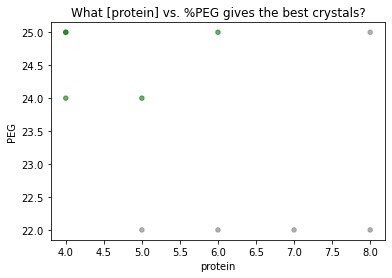

In [11]:
import traytable as tt
import matplotlib.pyplot as plt

# make trays
myscreen = tt.screen(row = 'protein', col = 'PEG', maxwell = 'H6', 
                     construct = 'HEWL', buffer = 'imidazole 20mM')
tray1 = tt.tray(myscreen, date = '2021-01-01', pH = 5.8,
                rows = [4,18],
                cols = [20,25])
tray2 = tt.clonetray(tray1, date = '2021-01-03',
                     rows = [4, 5, 6, 7, 8, 10, 12, 14])

# log results
df = tt.well(tray1, 'A6', 'good', quantity = 3)
df = tt.well(tray1, 'B6', 'good', quantity = 2, note = "chunkier than usual", old_df=df)
df = tt.well(tray1, 'C6', 'needles', old_df=df)
df = tt.well(tray2, ['B3', 'C3', 'D3', 'E3'], 'needles', old_df=df)
df = tt.well(tray2, ['A5', 'A6', 'B5'], 'good', old_df=df, note='borderline')

# plot results
colordict= {'good':'green',
            'needles':'gray'}
df.plot.scatter('protein', 'PEG', alpha=0.6, c=df.quality.map(colordict))
plt.title('What [protein] vs. %PEG gives the best crystals?')
plt.show()